<a href="https://colab.research.google.com/github/WilliamAshbee/DatascienceHomeworks/blob/main/Chapter4_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing in Python



First start with importing modules

In [ ]:
import pandas as pd
import numpy as np

**Reading Data from CSV file**
Then, read the Motor Insurance Fraud Claim data to a DataFrame

In [19]:
# this is only needed for this google colab
# from google.colab import drive
drive.mount('/content/drive')
# abt_path = '/content/drive/My Drive/data/MotorInsuranceFraudClaimABTFull.csv'

# for your local jupyter notebook, simply use the abs. or rel. path for the file
# comment out above code.
#abt_path = './MotorInsuranceFraudClaimABTFull.csv'
abt_path = '/content/drive/MyDrive/GeorgiaStateUniversity/courses/intro_datascience/ch4/MotorInsuranceFraudClaimABTFull.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now read the csv file using the `pd`. `df` is the variable name of the data frame. `df.head()` shows the first few records (default is 5).

In [20]:
df = pd.read_csv(abt_path, sep=',')
# you can alternatively use index_col parameter when reading csv files.
# df = pd.read_csv(abt_path, sep=',', index_col='ID')
df.head()

,ID,Insurance Type,Income of Policy Holder,Marital Status,Num Claimants,Injury Type,Overnight Hospital Stay,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
0,1,CI,0,NaN,2,Soft Tissue,No,1625,3250,2,2.0,1.0,0,1
1,2,CI,0,NaN,2,Back,Yes,15028,60112,1,0.0,0.0,15028,0
2,3,CI,54613,Married,1,Broken Limb,No,-99999,0,0,0.0,0.0,572,0
3,4,CI,0,NaN,3,Serious,Yes,270200,0,0,0.0,0.0,270200,0
4,5,CI,0,NaN,4,Soft Tissue,No,8869,0,0,0.0,0.0,0,1


`df.dtypes` would return all the column names and their data types (int64, float64, or object).
`df.info()` provides a more complex view with number of non-null values, data types etc.

In [21]:
# df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       500 non-null    int64  
 1   Insurance Type           500 non-null    object 
 2   Income of Policy Holder  500 non-null    int64  
 3   Marital Status           170 non-null    object 
 4   Num Claimants            500 non-null    int64  
 5   Injury Type              500 non-null    object 
 6   Overnight Hospital Stay  500 non-null    object 
 7   Claim Amount             500 non-null    int64  
 8   Total Claimed            500 non-null    int64  
 9   Num Claims               500 non-null    int64  
 10  Num Soft Tissue          490 non-null    float64
 11  % Soft Tissue            500 non-null    float64
 12  Claim Amount Received    500 non-null    int64  
 13  Fraud Flag               500 non-null    int64  
dtypes: float64(2), int64(8), o

**Iterating over Data Frames**

While it is not advisible, sometimes you may eventually need to iterate through records in your data frame. You can use `df.iterrows()`, `df.itertuples()`, or `df.iteritems()` to iterate. `iterrows()` returns a Series object per each row, and generally the slowest. `itertuples()` and `iteritems()` lets you iterate over row and column series as named tuples. We can use a `for` loop for iteration.

In [22]:
for index, row in df.iterrows():
    print(index, end=' ')
  # print(row) # uncomment this to see

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

Checking the basics of your data. For every column in the data frame, we can count the records (`df[name].size`), count NULL values (`sum(df[name].isnull().sum())`), and unique values (`df[name].unique().size`). 

In [23]:
# We will use df.iteritems() as it allows us to iterate through columns
for (name, series) in df.iteritems():
  print('ANALYZING THE COLUMN:', name)
  print('\tTotal number of records', series.size)
  print('\tNumber of missing values', series.isnull().sum())
  print('\tPercentage of missing values {0}%'.format(((series.isnull().sum()/series.size)*100)) )
  print('\tNumber of unique values', series.unique().size)

#alternatively, you can iterate over df.columns (column names) and access the columns
# for name in df.columns:
#   print('ANALYZING THE COLUMN:', name)
#   print('\tTotal number of records', df[name].size)
#   print('\tNumber of missing values', df[name].isnull().sum())
#   print('\tPercentage of missing values {0}%'.format(((df[name].isnull().sum()/df[name].size)*100)) )
#   print('\tNumber of unique values', df[name].unique().size)


ANALYZING THE COLUMN: ID
	Total number of records 500
	Number of missing values 0
	Percentage of missing values 0.0%
	Number of unique values 500
ANALYZING THE COLUMN: Insurance Type 
	Total number of records 500
	Number of missing values 0
	Percentage of missing values 0.0%
	Number of unique values 1
ANALYZING THE COLUMN: Income of Policy Holder
	Total number of records 500
	Number of missing values 0
	Percentage of missing values 0.0%
	Number of unique values 171
ANALYZING THE COLUMN: Marital Status
	Total number of records 500
	Number of missing values 330
	Percentage of missing values 66.0%
	Number of unique values 4
ANALYZING THE COLUMN: Num Claimants
	Total number of records 500
	Number of missing values 0
	Percentage of missing values 0.0%
	Number of unique values 4
ANALYZING THE COLUMN: Injury Type
	Total number of records 500
	Number of missing values 0
	Percentage of missing values 0.0%
	Number of unique values 4
ANALYZING THE COLUMN: Overnight Hospital Stay
	Total number of 

**Handling Missing Values**

For a larger DataFrame, it can be tedious to look for missing values manually. In this case, we can use the `isnull()` method to return a DataFrame with Boolean values that indicate whether a cell contains a numeric value (False) or if data is missing (True).

In [24]:
df.isnull().sum()

ID                           0
Insurance Type               0
Income of Policy Holder      0
Marital Status             330
Num Claimants                0
Injury Type                  0
Overnight Hospital Stay      0
Claim Amount                 0
Total Claimed                0
Num Claims                   0
Num Soft Tissue             10
% Soft Tissue                0
Claim Amount Received        0
Fraud Flag                   0
dtype: int64

Rows with missing values can be easily dropped via the `dropna()` method. Please, note significant data reduction – we went from 7,000 cells to 2,338 cells. `df.size` returns *(row-count x column-count)* when called for the entire DataFrame.

In [25]:
print(df.isnull().sum())
print('Number of cells before dropping rows with missing values: {}'.format(df.size))
print()
dfrd = df.dropna() # drop values with null values and re-assign the copy
print(dfrd.isnull().sum())
print('Number of cells after dropping rows with missing values: {}'.format(dfrd.size))

ID                           0
Insurance Type               0
Income of Policy Holder      0
Marital Status             330
Num Claimants                0
Injury Type                  0
Overnight Hospital Stay      0
Claim Amount                 0
Total Claimed                0
Num Claims                   0
Num Soft Tissue             10
% Soft Tissue                0
Claim Amount Received        0
Fraud Flag                   0
dtype: int64
Number of cells before dropping rows with missing values: 7000

ID                         0
Insurance Type             0
Income of Policy Holder    0
Marital Status             0
Num Claimants              0
Injury Type                0
Overnight Hospital Stay    0
Claim Amount               0
Total Claimed              0
Num Claims                 0
Num Soft Tissue            0
% Soft Tissue              0
Claim Amount Received      0
Fraud Flag                 0
dtype: int64
Number of cells after dropping rows with missing values: 2338


Instead of dropping rows, we can also drop columns with null values by setting the `axis` argument to 1, *i.e.*, `df = df.dropna(axis=1)`. This time we will use `df.shape` for feedback, as it returns separate counts for both dimensions of DataFrame, that is the (row-count, column-count) pair.

In [26]:
print(df.isnull().sum())
print('Number of cells before dropping columns with missing values: {}'.format(df.size))
print()
dfcd = df.dropna(axis=1) # drop columns with row values (axis=1 signifies columns)
print(dfcd.isnull().sum())
print('Number of cells after dropping columns with missing values: {}'.format(dfcd.size))

ID                           0
Insurance Type               0
Income of Policy Holder      0
Marital Status             330
Num Claimants                0
Injury Type                  0
Overnight Hospital Stay      0
Claim Amount                 0
Total Claimed                0
Num Claims                   0
Num Soft Tissue             10
% Soft Tissue                0
Claim Amount Received        0
Fraud Flag                   0
dtype: int64
Number of cells before dropping columns with missing values: 7000

ID                         0
Insurance Type             0
Income of Policy Holder    0
Num Claimants              0
Injury Type                0
Overnight Hospital Stay    0
Claim Amount               0
Total Claimed              0
Num Claims                 0
% Soft Tissue              0
Claim Amount Received      0
Fraud Flag                 0
dtype: int64
Number of cells after dropping columns with missing values: 6000


**Imputation:**
We can also replace each NaN value by the corresponding mean which is separately calculated for each feature column. Other options for this strategy are replacing with median or most frequent, which is useful for categorical feature values.

In [27]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_df = df.copy()
imputed_df['Num Soft Tissue'] = mean_imputer.fit_transform(df[['Num Soft Tissue']])
# Note here that we cannot use mean for Marital Status, simply because it is not a numeric attribute
print('\tTotal number of missing values in original df', df.isnull().sum().sum())
print('\tTotal number of missing values after imputation (for number of soft tissue)', imputed_df.isnull().sum().sum())

#There is a much more straightforward way for mean imputation but above can be used with much more flexible options
#df.apply(lambda x: x.fillna(x.mean()),axis=0) # this assumes all numerical values and uses lambda functions

	Total number of missing values in original df 340
	Total number of missing values after imputation (for number of soft tissue) 330


**Histograms**

We used `df.dtype` and `df.info()` before. We will be iterating through the entire dataframe again, but only selecting the attributes that are different than object. 

We import a popular plotting library `matplotlib` to generate
histograms and then save each of them in a separate PDF file.

In [28]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2899543d0>,
      dtype=object)

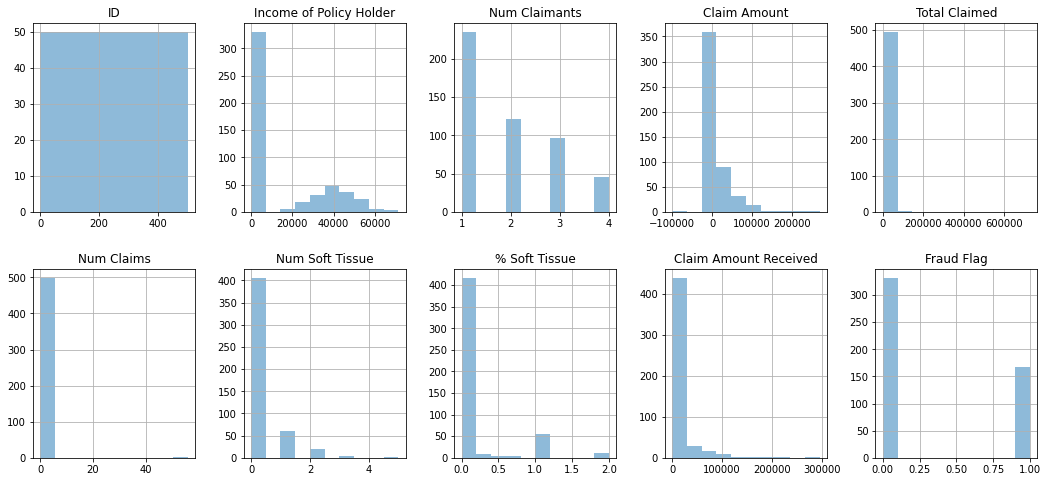

In [29]:
col_list = []
for (name, series) in df.iteritems():
    if series.dtype != 'object':
        col_list.append(name)

fig, ax = plt.subplots(2,5,figsize=(18,8)) # get a bigger figure
df_for_hist = df[col_list]

df_for_hist.hist(bins=10, alpha=0.5, ax=ax) 
#note here that you may change the bin size to see the distribution better.
# df_for_hist.hist(bins=20, alpha=0.5, ax=ax)
#you could also do the following
# print(df.select_dtypes(exclude=['object']).hist(bins=6))

**Box Plots**

A box plot displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum.
In a box plot, we draw a box from the first quartile to the third quartile. A vertical line goes through the box at the median. The whiskers go from each quartile to the minimum or maximum.

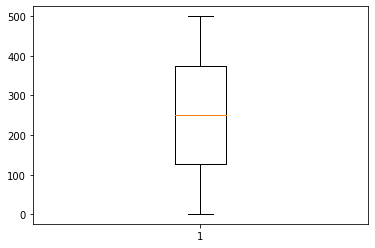

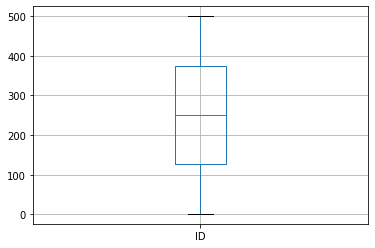

In [30]:
# Let's get the numeric data again, with another handy function
df_for_bp = df._get_numeric_data()

#you can plot one by one
plt.boxplot(df_for_bp['ID'])
plt.show()

# or you can use pandas-provided wrapper.
# df_for_bp.boxplot(column=['Total Claimed', 'Num Claims'])
df_for_bp.boxplot(column=['ID'])

The above-presented box-plots for ID column shows a nicely spread values, very similar to a normal distribution. However, we cannot infer that right away.

CLAIM AMOUNT
	Min value:-99999
	1st Quartile value:3322.25
	Median value:5663.0
	3rd Quartile value:12245.5
	Max value:270200
	Mean value:16373.204
	Std. Dev. value:29426.276960327068
	Variance value:865905775.7458757


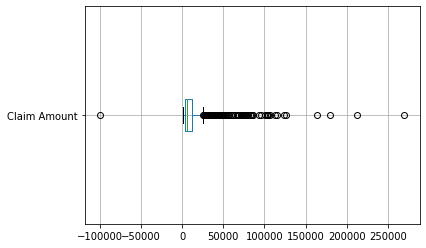

In [31]:
# Let's consider claim amount
df_for_bp.boxplot(column=['Claim Amount'], vert=False)

# Let's also see the values used in the five-number summary
print('CLAIM AMOUNT')
print('\tMin value:{}'.format(df_for_bp['Claim Amount'].min())) # minimum
print('\t1st Quartile value:{}'.format(df_for_bp['Claim Amount'].quantile(0.25))) # First quartile
print('\tMedian value:{}'.format(df_for_bp['Claim Amount'].median())) # median
print('\t3rd Quartile value:{}'.format(df_for_bp['Claim Amount'].quantile(0.75))) # Third quartile
print('\tMax value:{}'.format(df_for_bp['Claim Amount'].max())) # maximum

# additional descriptive statistics
print('\tMean value:{}'.format(df_for_bp['Claim Amount'].mean())) # mean
print('\tStd. Dev. value:{}'.format(df_for_bp['Claim Amount'].std())) # std dev
print('\tVariance value:{}'.format(df_for_bp['Claim Amount'].var())) # variance

**Scatter Plots**

A scatter plot is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data.

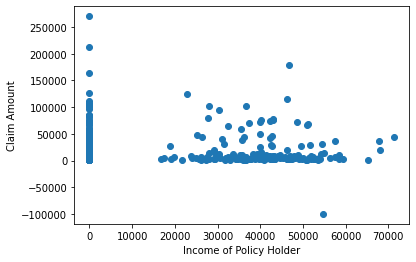

In [32]:
df_scatter = df._get_numeric_data()

#let's use classical method
plt.scatter(x=df_scatter['Income of Policy Holder'], y=df_scatter['Claim Amount'])
plt.xlabel('Income of Policy Holder')
plt.ylabel('Claim Amount')
plt.show()

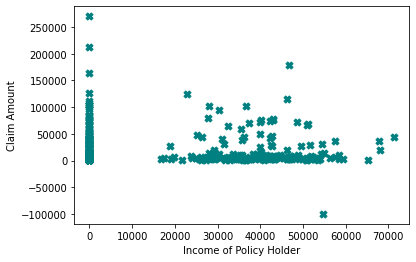

In [33]:
# we can also use pandas wrapper
df_scatter.plot(kind='scatter', x='Income of Policy Holder', y='Claim Amount', c='teal', s=50, marker='X')

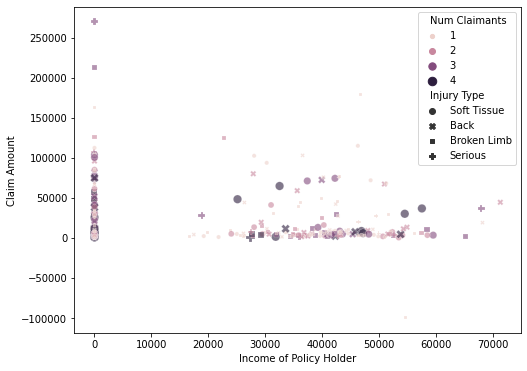

In [34]:
# seaborn also has a scatterplot function, which provides neat functionality
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Income of Policy Holder", y="Claim Amount", 
                hue="Num Claimants", style="Injury Type", size="Num Claimants", alpha=0.6)

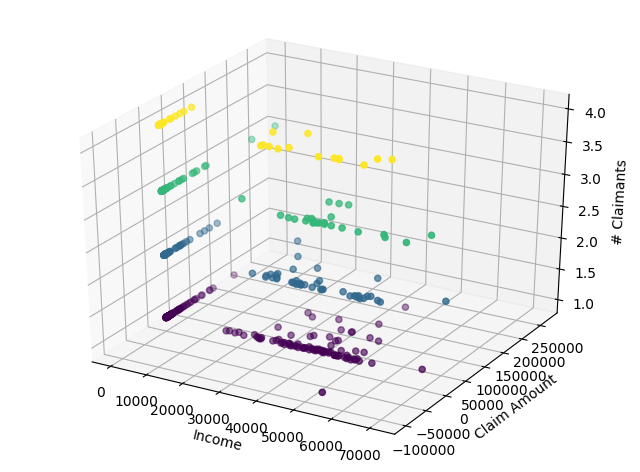

In [35]:
# you can also use 3D scatters when needed.  
from mpl_toolkits.mplot3d import Axes3D

# plot
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(xs=df_scatter['Income of Policy Holder'], ys=df_scatter['Claim Amount'], 
             zs=df_scatter['Num Claimants'], c=df_scatter['Num Claimants'], s=20)
ax.set_xlabel('Income')
ax.set_ylabel('Claim Amount')
ax.set_zlabel('# Claimants')
plt.show()

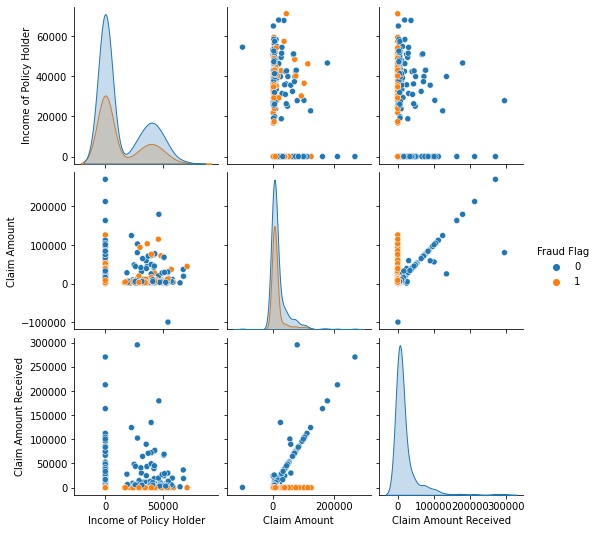

In [41]:
# We can also create a scatter plot matrix (SPLOM). 
# Seaborn, which is a visualization library, provides a high-level interface for these.
import seaborn as sns

df_concise = df_scatter[ ['Income of Policy Holder', 'Claim Amount', 'Claim Amount Received', 'Fraud Flag'] ]

# sns.set(style='ticks')
sns.pairplot(df_concise, hue='Fraud Flag')#, markers=['+', 'o']) # hue is for mapping plot aspects to different colors.

# you can use the following to see the full pairplot
# sns.pairplot(df_scatter)

**Heatmap of Correlation Matrix**

A heat map is a graphical representation of data where the individual values contained in a matrix are represented as colors.

                         Income of Policy Holder  Claim Amount  Claim Amount Received  Fraud Flag
Income of Policy Holder                 1.000000      0.009785               0.017212   -0.013792
Claim Amount                            0.009785      1.000000               0.797659   -0.080643
Claim Amount Received                   0.017212      0.797659               1.000000   -0.304245
Fraud Flag                             -0.013792     -0.080643              -0.304245    1.000000


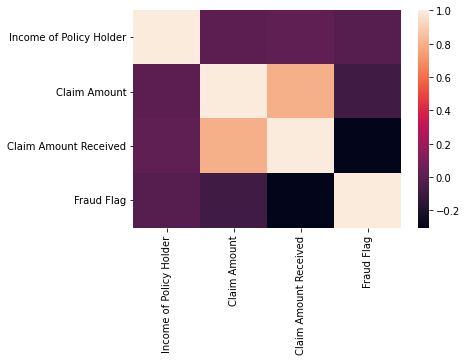

In [37]:
correlations = df_concise.corr()
sns.heatmap(correlations)
print(correlations.to_string())

**Min-max Normalization**
is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data. The general formula for a min-max of [0, 1] is given as:

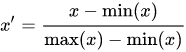

In [38]:
# we will use scikit-learn library for normalization
from sklearn import preprocessing

df_minmax = df_concise # for quicker illustration
print(df_minmax.head())
min_max_scaler = preprocessing.MinMaxScaler()

a_scaled = min_max_scaler.fit_transform(df_minmax) #a_scaled is an N-d numpy array now. We need to create a new dataframe off of it
df_scaled = pd.DataFrame(data=a_scaled, columns=df_minmax.columns)
df_scaled.head()

   Income of Policy Holder  Claim Amount  Claim Amount Received  Fraud Flag
0                        0          1625                      0           1
1                        0         15028                  15028           0
2                    54613        -99999                    572           0
3                        0        270200                 270200           0
4                        0          8869                      0           1


,Income of Policy Holder,Claim Amount,Claim Amount Received,Fraud Flag
0,0.000000,0.274512,0.000000,1.0
1,0.000000,0.310717,0.050890,0.0
2,0.766133,0.000000,0.001937,0.0
3,0.000000,1.000000,0.914992,0.0
4,0.000000,0.294080,0.000000,1.0


**Z-score Normalization**

In [39]:
zs_scaler = preprocessing.StandardScaler()
zs_scaled = zs_scaler.fit_transform(df_minmax)
df_zscaled = pd.DataFrame(data=zs_scaled, columns=df_minmax.columns)
df_zscaled.head()

,Income of Policy Holder,Claim Amount,Claim Amount Received,Fraud Flag
0,-0.684896,-0.501694,-0.427699,1.405770
1,-0.684896,-0.045760,0.064753,-0.711354
2,2.037391,-3.958664,-0.408955,-0.711354
3,-0.684896,8.634494,8.426489,-0.711354
4,-0.684896,-0.255273,-0.427699,1.405770


There are many more normalization techniques available for use in scikit-learn. You can find a nice comparison [in this tutorial](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html).

**Equal-width Binning**

We can use the histogram function of `numpy`:

`count,division = np.histogram(series)`

where `division` is the automatically calculated border for your bins and `count` is the population inside each bin. We have equal-width bins setup as [min, max] range with linearly spaced 5 markers (i.e., this results in 4 bin between the markers)

In [40]:
count, division = np.histogram(df['Claim Amount'], bins=5)
division

array([-99999. , -25959.2,  48080.6, 122120.4, 196160.2, 270200. ])